# Plotting 

In [25]:

import os
import json
from glob import glob
from collections import defaultdict


import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from statistics import mean
import matplotlib.pyplot as plt

In [26]:
# ------------------------------- setting start ------------------------------ #
# color
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
errorbar_color = "#3A3A3A"

# font
csfont = {'family':'Times New Roman', 'serif': 'Times' , 'size' : 23}
plt.rc('text', usetex=True)
plt.rc('font', **csfont)


# bar plot size
bar_width = 0.4
bar_btw_space = 0.04
bar_space = 0.2

# errorbar plot size
err_lw=1.5
err_capsize=4
err_capthick=1.5

# set fig size
figsize=(6.4, 4.8)
# -------------------------------- setting end ------------------------------- #

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Plotting PSNR

Checking mesh file: data/hotdog/area_1_occlusion/per_view_gs_mesh.json
File exists: True
Available iterations: ['ours_1']

Processing Area-based budgeting:
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  No area data to plot!

Processing Distortion-based budgeting:
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  No distortion data to plot!


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: PSNR_vs_budget_hotdog.png and .eps



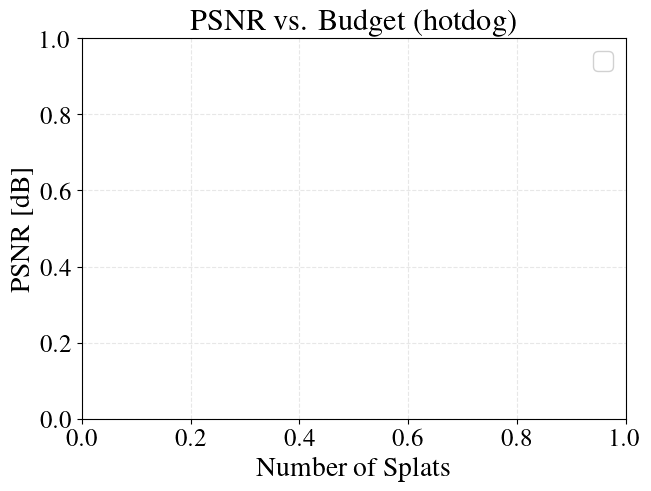

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



Plotting SSIM

Checking mesh file: data/hotdog/area_1_occlusion/per_view_gs_mesh.json
File exists: True
Available iterations: ['ours_1']

Processing Area-based budgeting:
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  No area data to plot!

Processing Distortion-based budgeting:
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  Checking: per_view_gs_mesh.json, exists: True
  No distortion data to plot!


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.



Saved: SSIM_vs_budget_hotdog.png and .eps



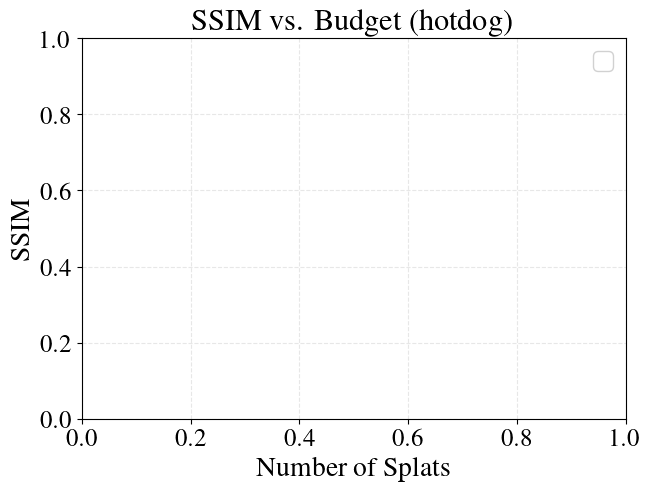

In [27]:
def budget_policy_curves():
    """
    Plot metrics vs budget for different budgeting policies.
    
    - Pure mesh (horizontal line) - area_1_occlusion
    - Area-based budgeting - area_*_occlusion (40k, 80k, 160k, 320k)
    - Distortion-based budgeting - distortion_*_occlusion (40k, 80k, 160k, 320k)
    """
    SCENE_NAME = 'hotdog'
    ITERATION = 'iteration_15000'  # Last iteration
    
    input_dir = Path('./data') / SCENE_NAME
    output_dir = Path('./plots') / 'budget_policy_curves' / SCENE_NAME
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Define policies and their budgets
    budgets = [40000, 80000, 160000, 320000]
    
    # Metrics to plot
    metrics = {
        'PSNR': {'ylabel': 'PSNR [dB]', 'title': 'PSNR'},
        'SSIM': {'ylabel': 'SSIM', 'title': 'SSIM'},
        # 'LPIPS': {'ylabel': 'LPIPS', 'title': 'LPIPS'}
    }
    
    # Plot each metric
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        print(f"\n{'='*60}")
        print(f"Plotting {metric_key}")
        print(f"{'='*60}")
        
        # 1. Pure mesh (horizontal line) - area_1_occlusion
        mesh_file = input_dir / 'area_1_occlusion' / 'per_view_gs_mesh.json'
        print(f"\nChecking mesh file: {mesh_file}")
        print(f"File exists: {mesh_file.exists()}")
        
        if mesh_file.exists():
            with open(mesh_file, 'r') as f:
                data = json.load(f)
            
            print(f"Available iterations: {list(data.keys())}")
            
            if ITERATION in data:
                metric_data = data[ITERATION][metric_key]
                if isinstance(metric_data, dict):
                    values = [v for v in metric_data.values() if v != -1.0]
                else:
                    values = [metric_data]
                
                mean_val = np.mean(values)
                std_val = np.std(values)
                stderr = std_val / np.sqrt(len(values))
                
                # Plot horizontal line spanning the budget range
                ax.axhline(y=mean_val, color=color_palette[0], linestyle='--', 
                          linewidth=2.5, label='Pure Mesh', alpha=0.8, zorder=1)
                ax.fill_between([0, 350000], mean_val - stderr, mean_val + stderr, 
                               color=color_palette[0], alpha=0.2, zorder=1)
                
                print(f"Pure Mesh - {metric_key}: mean={mean_val:.4f}, std={std_val:.4f}, n={len(values)}")
        
        # 2. Area-based budgeting
        area_xs = []
        area_ys = []
        area_errs = []
        
        print(f"\nProcessing Area-based budgeting:")
        for budget in budgets:
            area_file = input_dir / f'area_{budget}_occlusion' / 'per_view_gs_mesh.json'
            print(f"  Checking: {area_file.name}, exists: {area_file.exists()}")
            
            if area_file.exists():
                with open(area_file, 'r') as f:
                    data = json.load(f)
                
                if ITERATION in data:
                    metric_data = data[ITERATION][metric_key]
                    if isinstance(metric_data, dict):
                        values = [v for v in metric_data.values() if v != -1.0]
                    else:
                        values = [metric_data]
                    
                    mean_val = np.mean(values)
                    std_val = np.std(values)
                    stderr = std_val / np.sqrt(len(values))
                    num_splats = data[ITERATION].get('num_splats', budget)
                    
                    area_xs.append(num_splats)
                    area_ys.append(mean_val)
                    area_errs.append(stderr)
                    
                    print(f"    Budget {budget}: mean={mean_val:.4f}, std={std_val:.4f}, splats={num_splats}")
        
        if area_xs:
            print(f"  Plotting {len(area_xs)} area points")
            ax.errorbar(area_xs, area_ys, yerr=area_errs,
                       marker='o', markersize=8, linewidth=2.5,
                       capsize=err_capsize, capthick=err_capthick,
                       color=color_palette[1], label='Area-based', zorder=2)
        else:
            print("  No area data to plot!")
        
        # 3. Distortion-based budgeting
        dist_xs = []
        dist_ys = []
        dist_errs = []
        
        print(f"\nProcessing Distortion-based budgeting:")
        for budget in budgets:
            dist_file = input_dir / f'distortion_{budget}_occlusion' / 'per_view_gs_mesh.json'
            print(f"  Checking: {dist_file.name}, exists: {dist_file.exists()}")
            
            if dist_file.exists():
                with open(dist_file, 'r') as f:
                    data = json.load(f)
                
                if ITERATION in data:
                    metric_data = data[ITERATION][metric_key]
                    if isinstance(metric_data, dict):
                        values = [v for v in metric_data.values() if v != -1.0]
                    else:
                        values = [metric_data]
                    
                    mean_val = np.mean(values)
                    std_val = np.std(values)
                    stderr = std_val / np.sqrt(len(values))
                    num_splats = data[ITERATION].get('num_splats', budget)
                    
                    dist_xs.append(num_splats)
                    dist_ys.append(mean_val)
                    dist_errs.append(stderr)
                    
                    print(f"    Budget {budget}: mean={mean_val:.4f}, std={std_val:.4f}, splats={num_splats}")
        
        if dist_xs:
            print(f"  Plotting {len(dist_xs)} distortion points")
            ax.errorbar(dist_xs, dist_ys, yerr=dist_errs,
                       marker='s', markersize=8, linewidth=2.5,
                       capsize=err_capsize, capthick=err_capthick,
                       color=color_palette[2], label='Distortion-based', zorder=2)
        else:
            print("  No distortion data to plot!")
        
        # Formatting
        ax.set_xlabel('Number of Splats', fontsize=20)
        ax.set_ylabel(metric_info['ylabel'], fontsize=20)
        ax.set_title(f"{metric_info['title']} vs. Budget ({SCENE_NAME})", fontsize=22)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        fig.set_constrained_layout(True)
        
        # Save both formats
        base_name = f'{metric_key}_vs_budget_{SCENE_NAME}'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"\nSaved: {base_name}.png and .eps\n")
        
        plt.show()
        plt.close()


budget_policy_curves()

In [28]:

def policy_iter_curves():
    """
    Plot metrics vs budget for different policies using JSON data
    """
    # Configuration
    EXPERIMENT_DATE = "1116_nerfsynthetic"
    SCENE_NAME = "hotdog"
    MESH_TYPE = "area_75000_occlusion"
    
    input_file = Path(f'output/{EXPERIMENT_DATE}/{SCENE_NAME}/{MESH_TYPE}/per_view_gs_mesh.json')
    output_dir = Path(f'output/{EXPERIMENT_DATE}/figure_policy')
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Load JSON data
    with open(input_file, 'r') as f:
        data = json.load(f)
    
    print(f"Loaded data with {len(data)} iterations")
    
    # Extract data for each iteration
    iterations = sorted(data.keys(), key=lambda x: int(x.split('_')[1]))
    print(f"Iterations: {iterations}")
    
    # Metrics to plot
    metrics = {
        'PSNR': {'ylabel': 'PSNR [dB]', 'title': 'PSNR'},
        'SSIM': {'ylabel': 'SSIM', 'title': 'SSIM'},
        'LPIPS': {'ylabel': 'LPIPS', 'title': 'LPIPS'}
    }
    
    # Plot each metric
    for metric_key, metric_info in metrics.items():
        fig, ax = plt.subplots(figsize=figsize)
        
        xs = []
        ys = []
        
        for iteration in iterations:
            # Extract iteration number
            iter_num = int(iteration.split('_')[1])
            xs.append(iter_num)
            
            # Calculate mean of metric across all views
            metric_data = data[iteration][metric_key]
            if isinstance(metric_data, dict):
                # Per-view data - calculate mean
                values = [v for v in metric_data.values() if v != -1.0]
                mean_val = np.mean(values) if values else 0
                ys.append(mean_val)
                print(f"{metric_key} @ {iteration}: {len(values)} views, mean={mean_val:.4f}")
            else:
                # Single value
                ys.append(metric_data)
                print(f"{metric_key} @ {iteration}: {metric_data:.4f}")
        
        print(f"\n{metric_key} - X values: {xs}")
        print(f"{metric_key} - Y values: {ys}\n")
        
        # Plot line
        ax.plot(xs, ys, 
               marker='o', 
               linestyle='-', 
               linewidth=2.5, 
               markersize=7,
               color=color_palette[0],
               label=SCENE_NAME)
        
        # Formatting - use raw string for hash
        ax.set_xlabel(r'Iterations', fontsize=20)  # Removed \# to avoid LaTeX issues
        ax.set_ylabel(metric_info['ylabel'], fontsize=20)
        ax.set_title(f"{metric_info['title']} vs. Iterations", fontsize=22)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.legend(loc='best', framealpha=0.9, fontsize=18)
        ax.tick_params(labelsize=18)
        
        # Use constrained_layout instead of tight_layout to avoid LaTeX issues
        fig.set_constrained_layout(True)
        
        # Save both formats
        base_name = f'{metric_key}_vs_iterations'
        plt.savefig(output_dir / f'{base_name}.png', dpi=300, bbox_inches='tight')
        plt.savefig(output_dir / f'{base_name}.eps', format='eps', bbox_inches='tight')
        print(f"Saved: {base_name}.png and .eps")
        
        plt.show()
        plt.close()


# policy_iter_curves()